In [107]:
import numpy as np
from pytictoc import TicToc

In [108]:
def generic_grad(f,gf,lsearch,x0,eps):
    clock = TicToc()
    clock.tic()
    fs = [f(x0)]
    gs = [np.linalg.norm(gf(x0))]
    ts = [0]
    xk = x0
    gk = gf(xk)
    while np.linalg.norm(gk)>eps:
        gk = gf(xk)
        tk = lsearch(f,xk,gk)
        xk = xk - tk*gk
        fs.append(f(xk))
        gs.append(np.linalg.norm(gk))
        ts.append(clock.tocvalue())
    return xk, fs, gs, ts

In [109]:
def const_step(s):
    return lambda f, xk,gk: s

def exact_quad(A):
    try:
        np.linalg.cholesky(A)

    except np.linalg.LinAlgError:
        print("Error: A is not Positive-Definite")
        ##check if multiplying by 0.5 is needed
    return lambda f, xk, gk: (np.linalg.norm(gk) / np.linalg.norm(np.matmul(A,gk)))**2

def back(alpha,beta,s):
    t = s
    return lambda f, xk, gk: calc_t(f, xk, gk,alpha,beta,s)

def calc_t(f, xk, gk, alpha, beta, s):
    t = s
    while f(xk-t*gk) >= f(xk)-alpha*t*(np.linalg.norm(gk)**2):
        t = beta*t
    return t

In [110]:
np.random.seed(123)
A = np.random.uniform(low=0, high=1, size=(20, 5))
A

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897],
       [0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752],
       [0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426],
       [0.73799541, 0.18249173, 0.17545176, 0.53155137, 0.53182759],
       [0.63440096, 0.84943179, 0.72445532, 0.61102351, 0.72244338],
       [0.32295891, 0.36178866, 0.22826323, 0.29371405, 0.63097612],
       [0.09210494, 0.43370117, 0.43086276, 0.4936851 , 0.42583029],
       [0.31226122, 0.42635131, 0.89338916, 0.94416002, 0.50183668],
       [0.62395295, 0.1156184 , 0.31728548, 0.41482621, 0.86630916],
       [0.25045537, 0.48303426, 0.98555979, 0.51948512, 0.61289453],
       [0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383],
       [0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234],
       [0.66931378, 0.58593655, 0.6249035 , 0.67468905, 0.84234244],
       [0.08319499, 0.76368284, 0.24366637, 0.19422296, 0.57245696],
       [0.09571252, 0.88532683, 0.

In [111]:
def f(x):
    Ax = np.matmul(A,x)
    return np.matmul(Ax.T,Ax)
def gf(x):
    return 2*np.matmul(A.T,np.matmul(A,x))

In [112]:
ATA_max_eig = np.linalg.eigh(np.matmul(A.T,A))[0][-1]
t_const = pow(2*ATA_max_eig,-1)
x0 = np.ones(A.shape[1])
x_const , fs_const , gs_const , ts_const = generic_grad(f,gf,const_step(t_const),x0,eps=pow(10,-5))


In [113]:
x_exact , fs_exact , gs_exact , ts_exact = generic_grad(f,gf,exact_quad(np.matmul(A.T,A)),x0,eps=pow(10,-5))

In [114]:
x_back , fs_back , gs_back , ts_back = generic_grad(f, gf, back(alpha=0.5,beta=0.5,s=1), x0, eps=pow(10,-5))

Text(0.5, 1.0, 'function values per iteration')

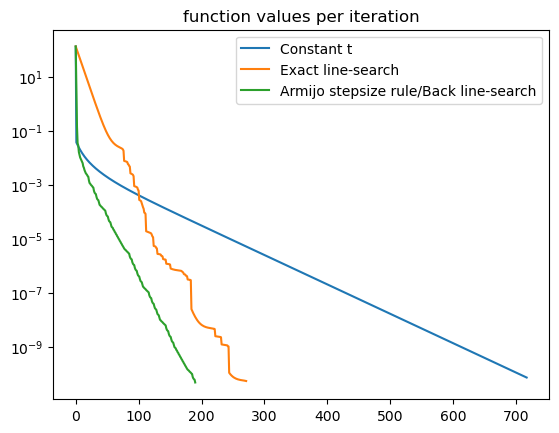

In [126]:
import matplotlib.pyplot as plt

plt.semilogy(np.arange(len(fs_const)),fs_const, label='Constant t')
plt.semilogy(np.arange(len(fs_exact)),fs_exact, label='Exact line-search')
plt.semilogy(np.arange(len(fs_back)),fs_back, label='Armijo stepsize rule/Back line-search')
plt.legend()
plt.title('function values per iteration')

Text(0.5, 1.0, 'gradient values per iteration')

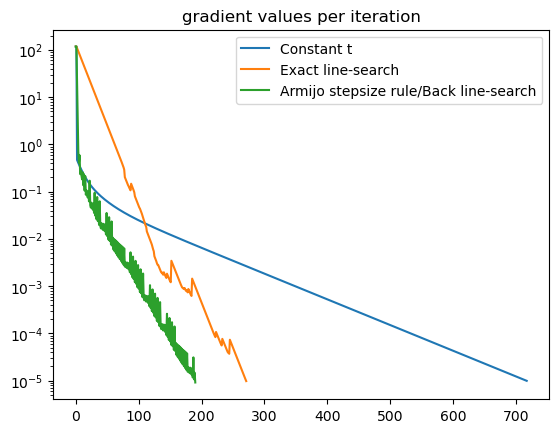

In [127]:
plt.semilogy(np.arange(len(gs_const)),gs_const, label='Constant t')
plt.semilogy(np.arange(len(gs_exact)),gs_exact, label='Exact line-search')
plt.semilogy(np.arange(len(gs_back)),gs_back, label='Armijo stepsize rule/Back line-search')
plt.legend()
plt.title('gradient values per iteration')

Text(0.5, 1.0, 'function values over time(sec)')

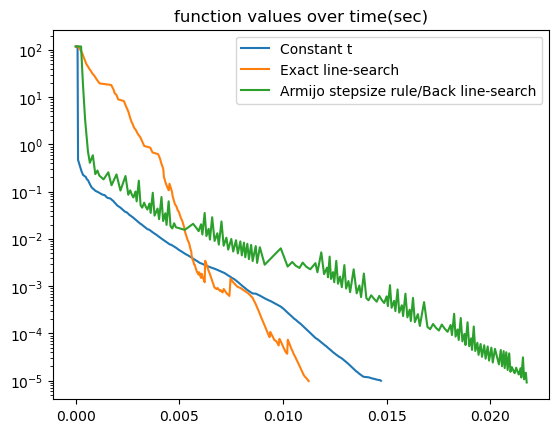

In [131]:
plt.semilogy(ts_const,gs_const, label='Constant t')
plt.semilogy(ts_exact,gs_exact, label='Exact line-search')
plt.semilogy(ts_back,gs_back, label='Armijo stepsize rule/Back line-search')
plt.legend()
plt.title('function values over time(sec)')